In [1]:
!RUST_BACKTRACE=1 cargo run -- ../models/rover.mo -t ../templates/sympy.jinja > rover_sympy.py

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.15s
     Running `/home/jgoppert/git/rumoca_parol/target/debug/rumoca ../models/rover.mo -t ../templates/sympy.jinja`


In [2]:
%load_ext autoreload
%autoreload 2

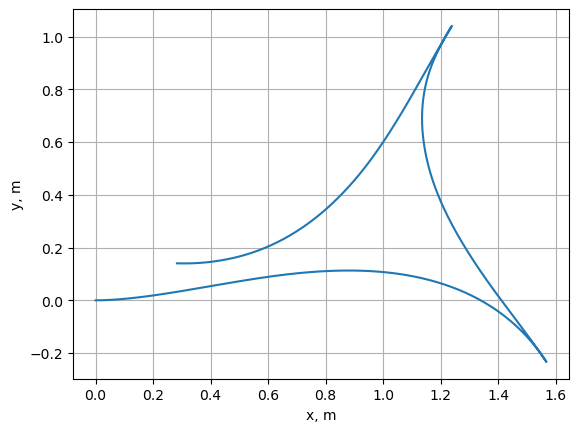

In [3]:
import rover_sympy
import numpy as np
import matplotlib.pyplot as plt

model = rover_sympy.Model()

def u(t):
    return np.array([
        10*np.sin(t), #throttle
        np.cos(t) #steering
        ])

t = np.arange(0, 10, 0.01)
res = model.simulate(t, u)

plt.figure()
#plt.plot(res['t'], res['x'].T);
plt.plot(res['x'][1, :], res['x'][2, :])
plt.xlabel('x, m')
plt.ylabel('y, m')
plt.grid()
